# 1) Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")

# 2) Coleta dos Dados

In [2]:
df = pd.read_csv(r'../Dados/Tabela_final/tabela_final.csv').drop(columns = 'Unnamed: 0')
df

,IBGE7,UF,NOME,LATITUDE,LONGITUDE,PREC_MED,TEMP_MED,QUAL_MED_AGUA,DIST_CORPO_AGUA,DIST_EF_PUB,...,AREA_IRRIGADA_TOT,AREA_IRRIGADA_POT,AREA_IRRIGADA_POT_E,IDH,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE
0,2700300,AL,ARAPIRACA,-9.75487,-36.6615,2.263969,26.327873,62.439167,42.035186,28.233333,...,327.176525,0.000000,0.000000,0.649,82.16,30.83,97.38,99.56,12.38,0.96
1,2700706,AL,BATALHA,-9.67420,-37.1330,1.953488,27.754398,65.300843,24.642419,29.840000,...,0.000000,0.000000,0.000000,0.594,58.61,41.21,88.09,98.93,18.22,5.50
2,2700904,AL,BELO MONTE,-9.82272,-37.2770,1.953488,27.754398,65.300843,3.297594,35.793333,...,0.000000,719.609736,0.000000,0.517,36.42,39.22,99.16,97.68,17.30,12.01
3,2701209,AL,CACIMBINHAS,-9.40121,-36.9911,2.296316,25.157018,65.300843,58.541833,38.426667,...,0.000000,0.000000,0.000000,0.531,18.47,32.14,87.36,98.30,60.86,8.89
4,2701605,AL,CANAPI,-9.11932,-37.5967,1.516842,27.046445,66.893107,68.942666,29.126667,...,0.000000,0.000000,0.000000,0.506,18.20,44.21,93.07,96.97,40.57,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2806008,SE,RIBEIRÓPOLIS,-10.53570,-37.4380,0.984831,26.969830,64.911294,1.388835,30.700000,...,0.000000,20.313131,0.000000,0.613,80.88,19.75,98.78,99.49,14.85,3.47
1257,2807006,SE,SÃO MIGUEL DO ALEIXO,-10.38470,-37.3836,1.894041,25.452166,64.911294,16.508752,33.133333,...,0.000000,22.538001,0.000000,0.567,61.09,28.75,95.20,99.04,24.96,10.33
1258,2807105,SE,SIMÃO DIAS,-10.73870,-37.8097,2.499337,24.440877,65.088090,2.685846,32.926667,...,34.223210,80.124605,0.000000,0.604,60.38,24.58,97.96,98.62,30.64,4.38
1259,2807303,SE,TELHA,-10.20640,-36.8818,4.713677,26.562289,64.553680,4.298665,31.706667,...,353.237872,42.721300,0.000000,0.604,89.06,31.18,99.05,99.44,5.01,2.05


# 2) Análise Exploratória

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBGE7                1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   PREC_MED             1261 non-null   float64
 6   TEMP_MED             1261 non-null   float64
 7   QUAL_MED_AGUA        1261 non-null   float64
 8   DIST_CORPO_AGUA      1261 non-null   float64
 9   DIST_EF_PUB          1261 non-null   float64
 10  DIST_EM_PUB          1261 non-null   float64
 11  IDEB_AI              1261 non-null   float64
 12  IDEB_AF              1261 non-null   float64
 13  DOCSUP_EF_PUB        1261 non-null   float64
 14  DOCSUP_EM_PUB        1261 non-null   float64
 15  TXNASC7C             1261 non-null   f

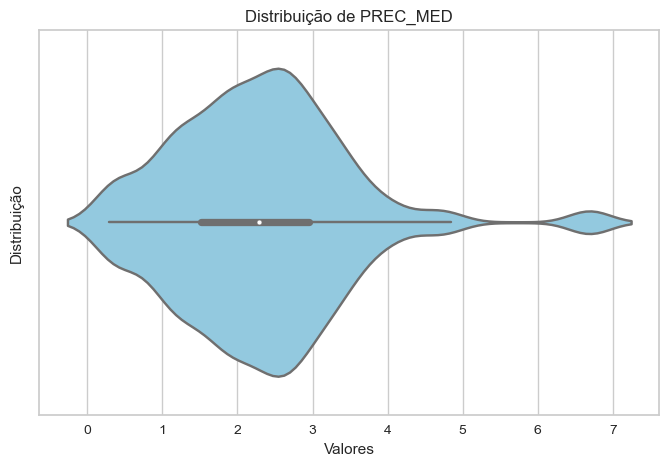

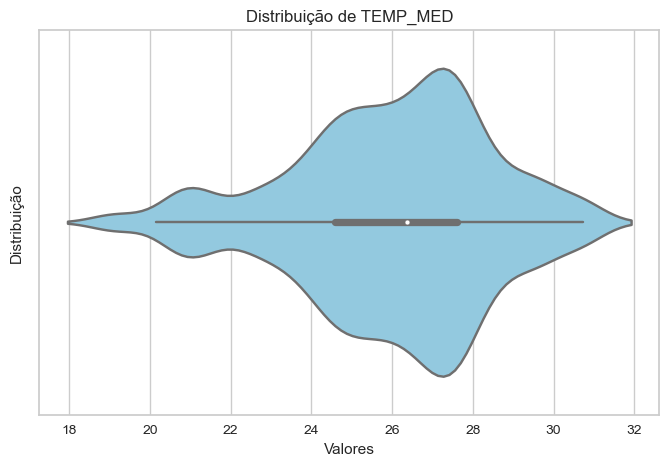

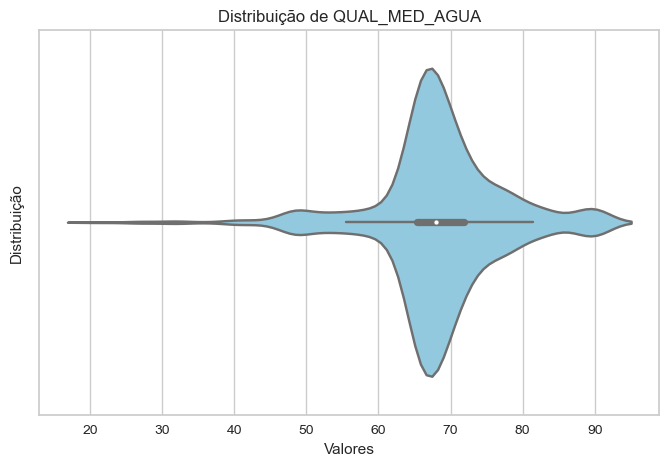

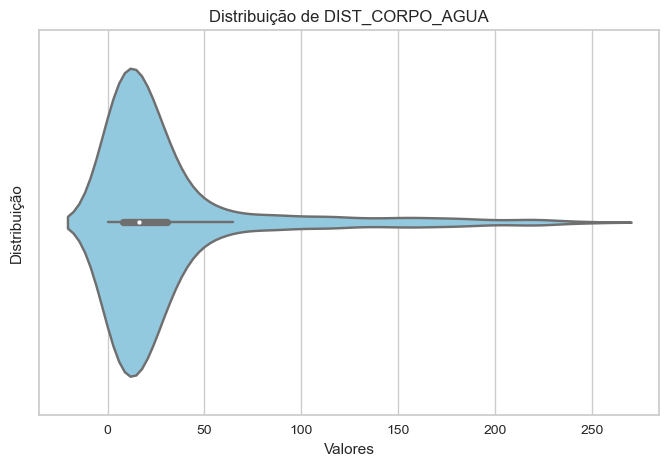

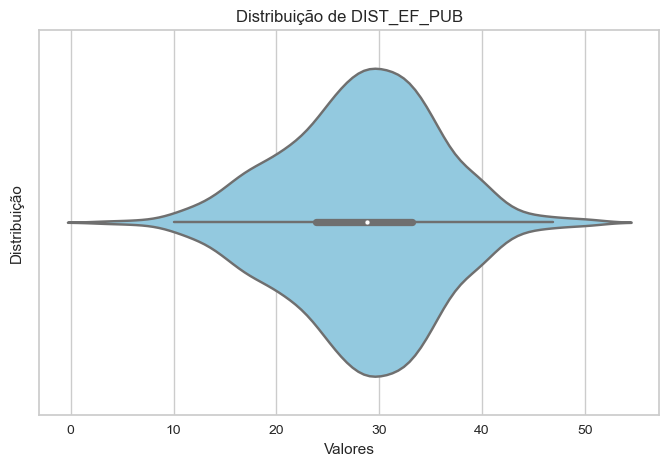

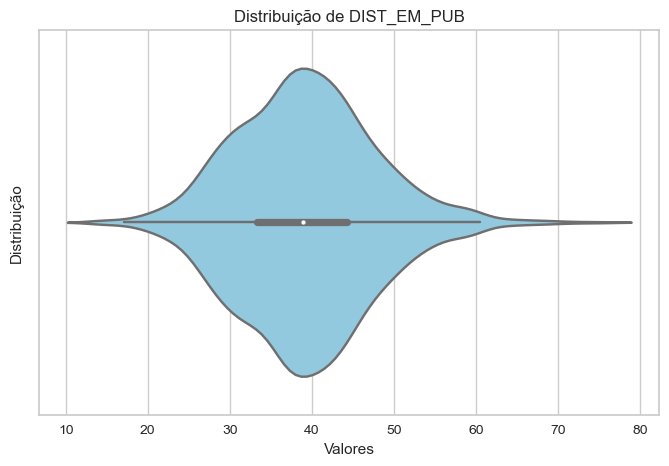

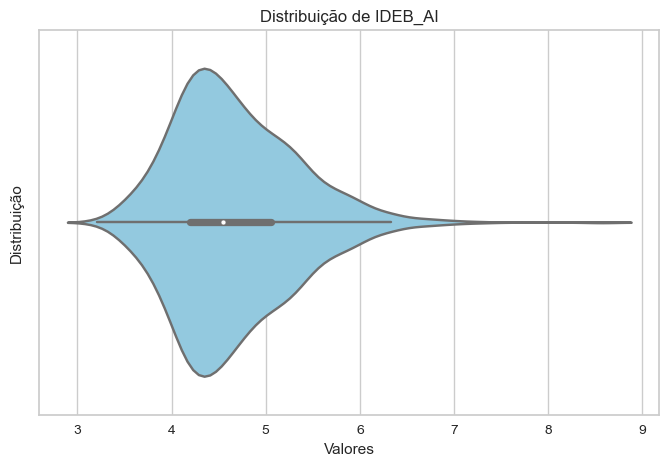

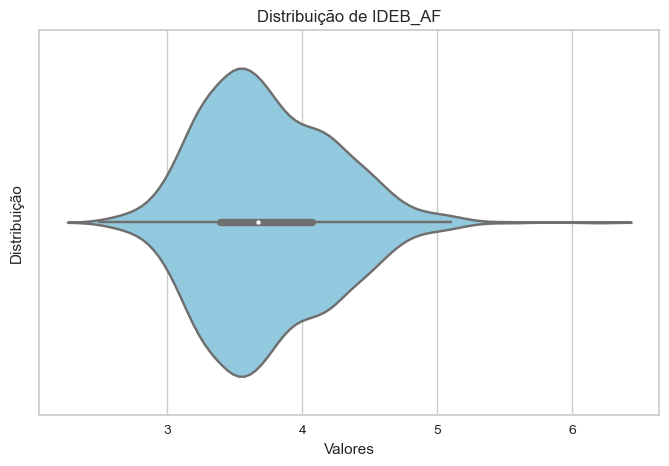

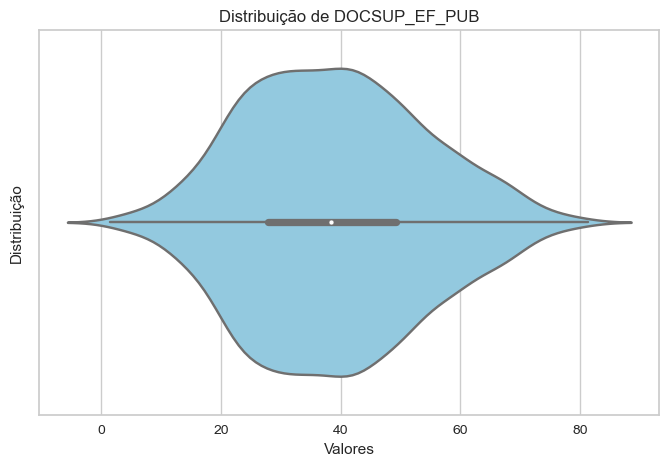

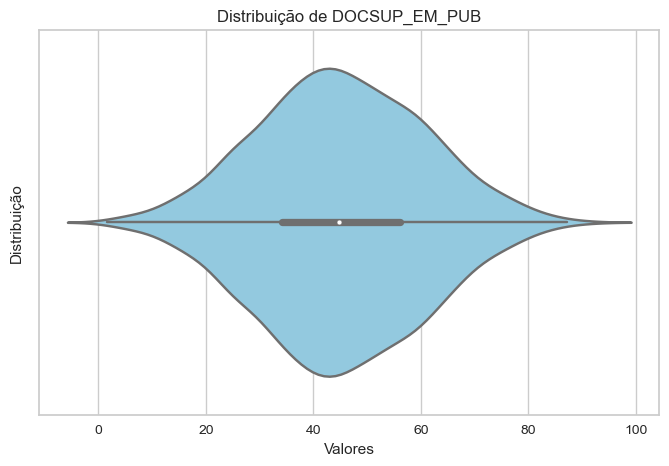

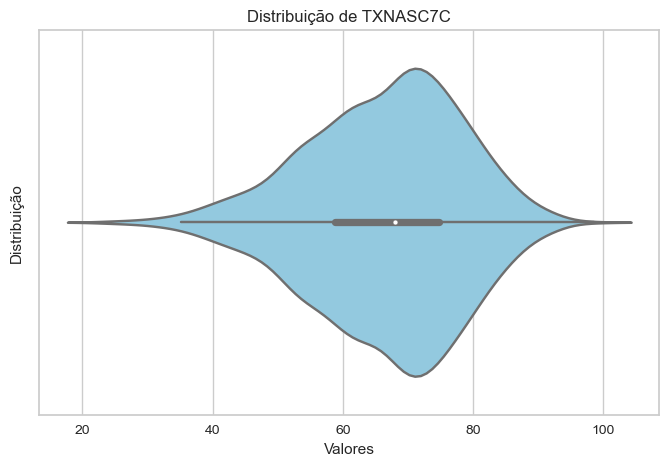

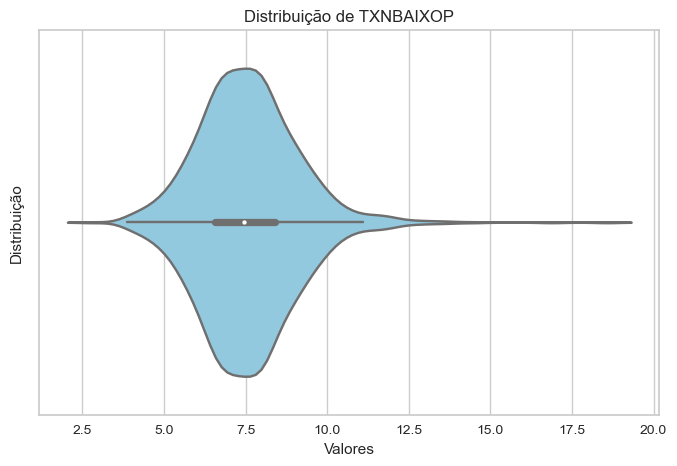

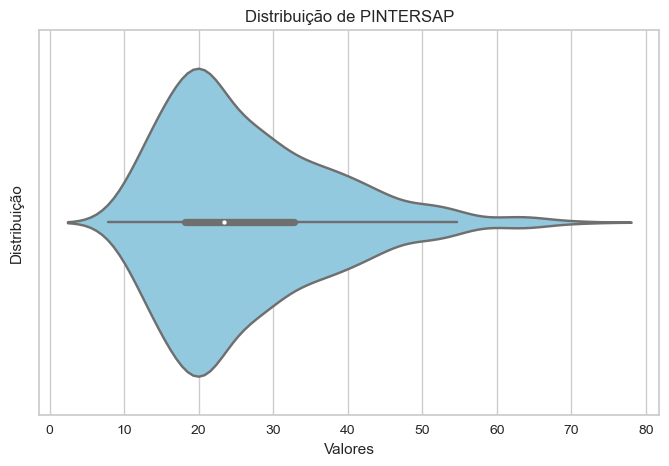

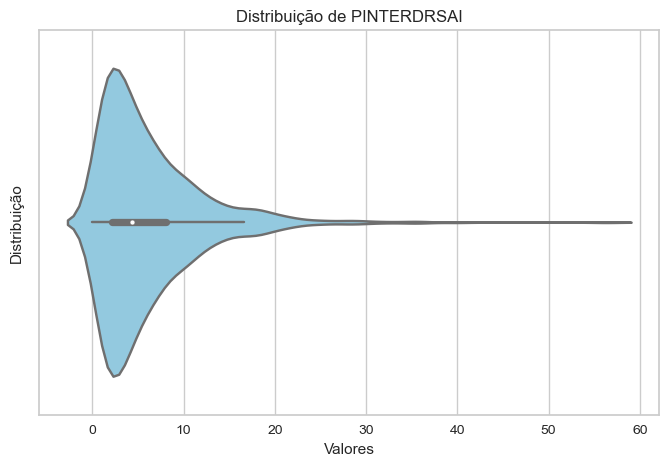

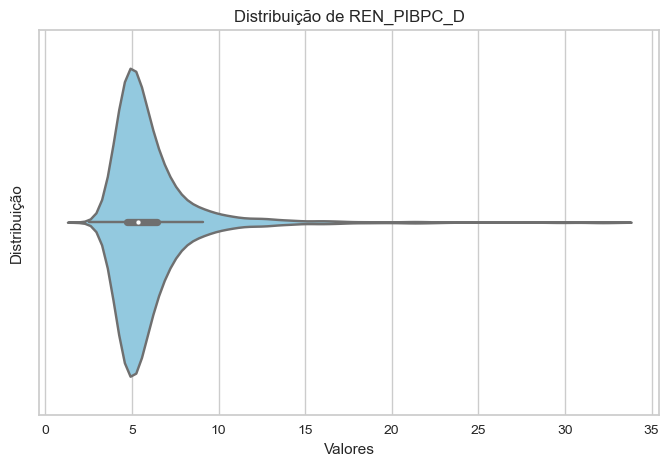

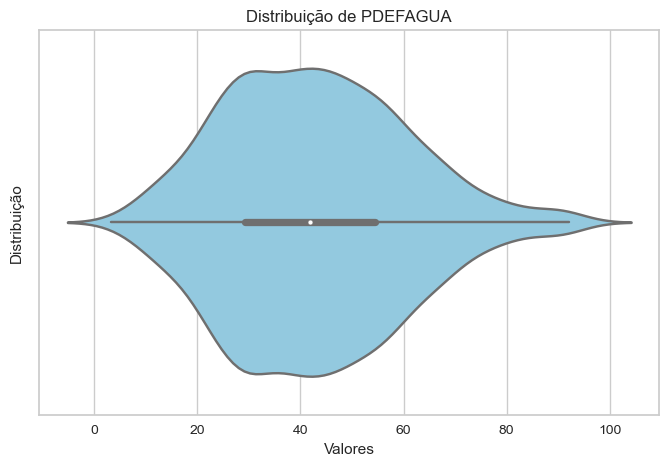

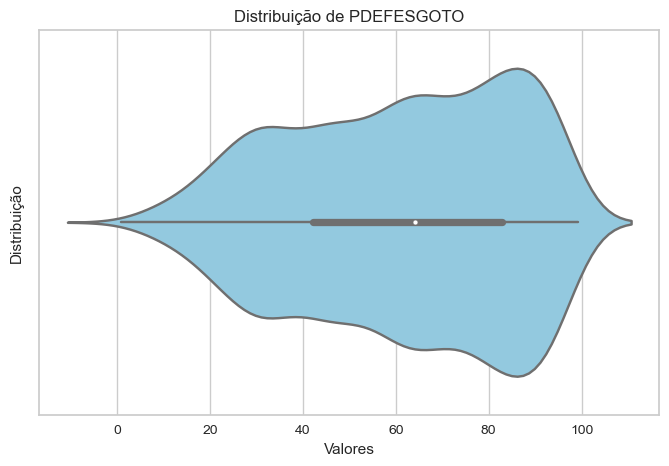

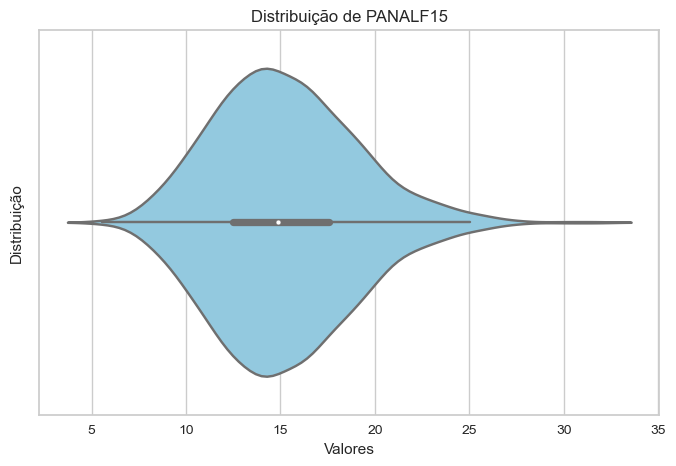

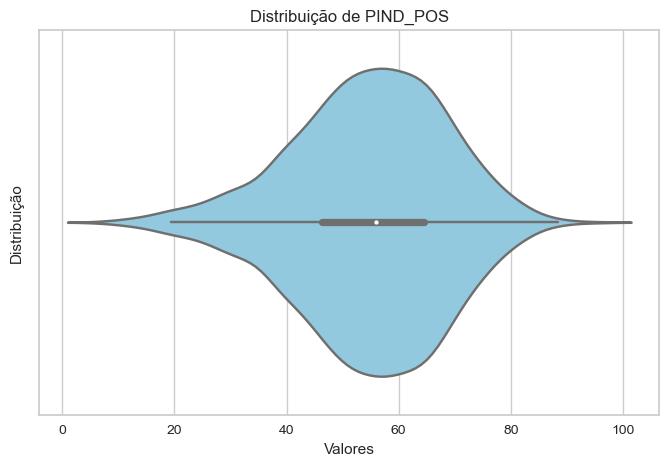

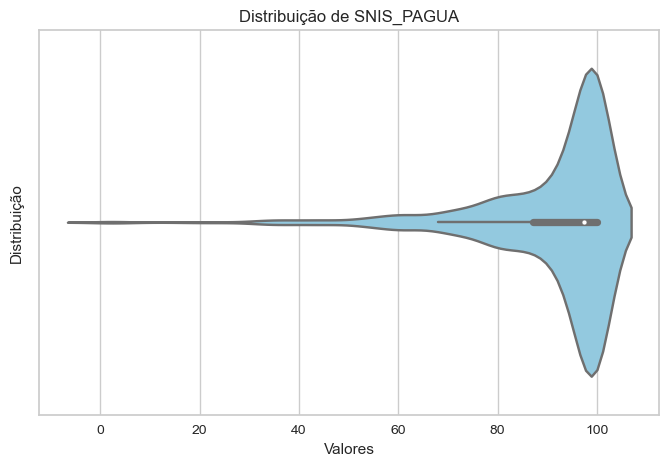

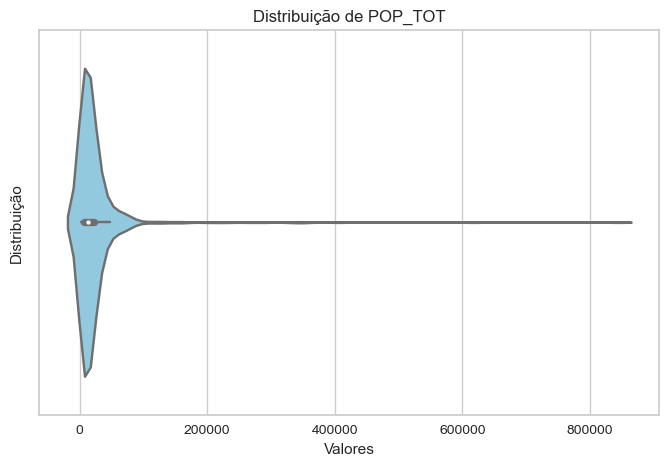

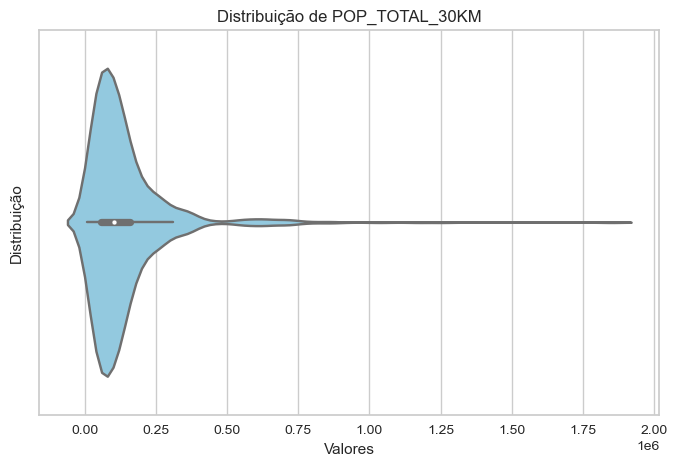

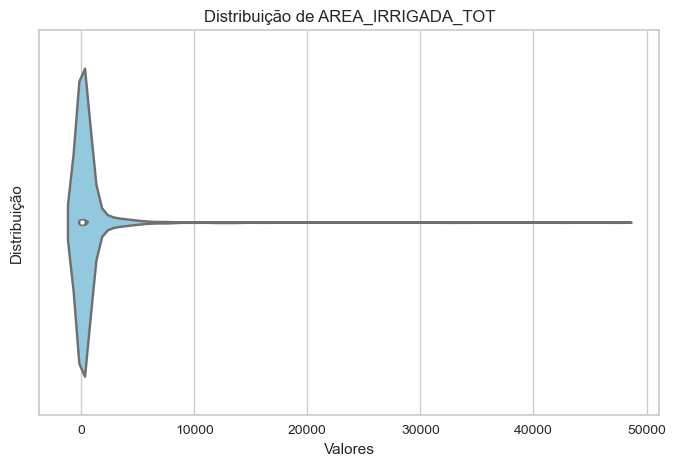

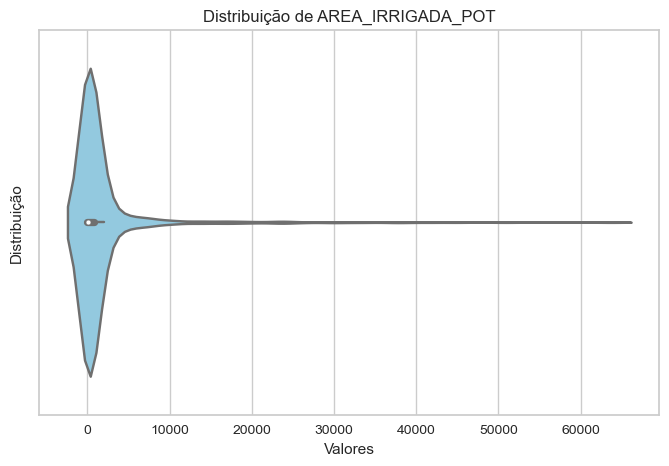

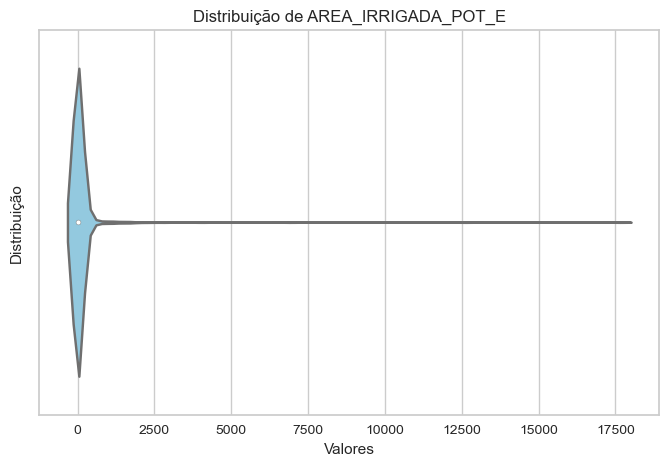

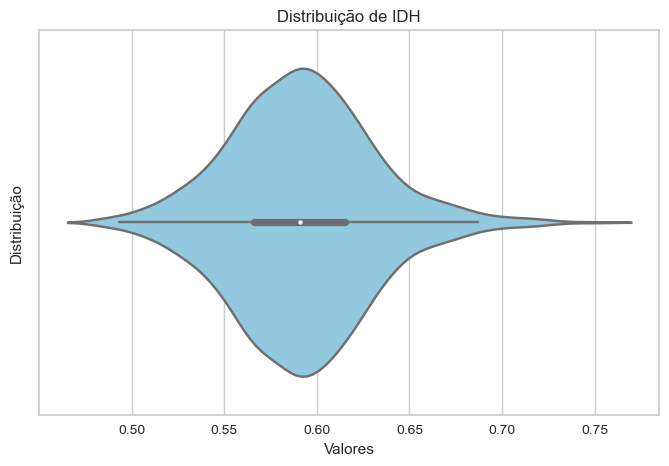

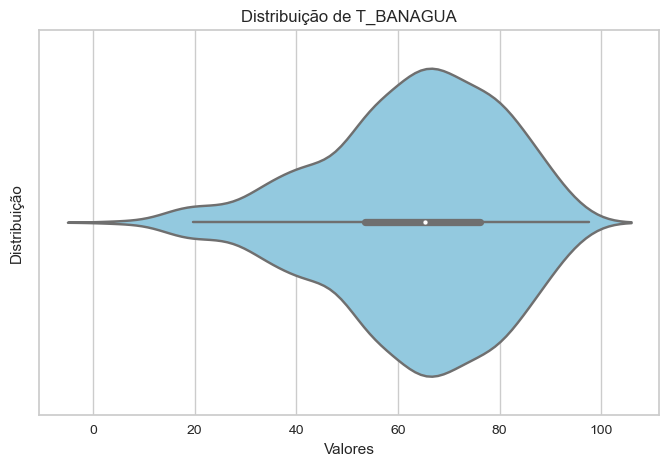

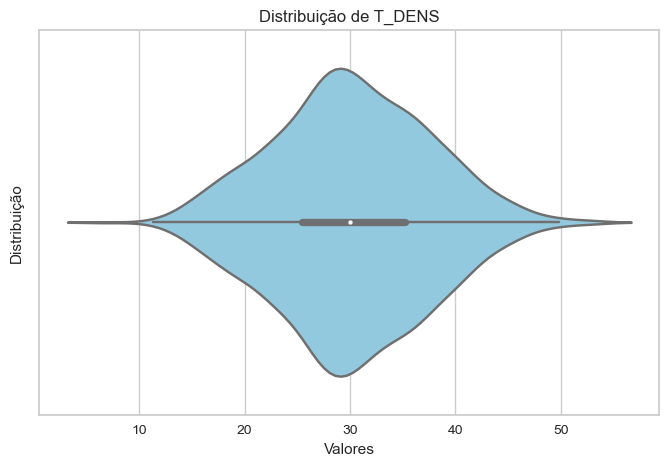

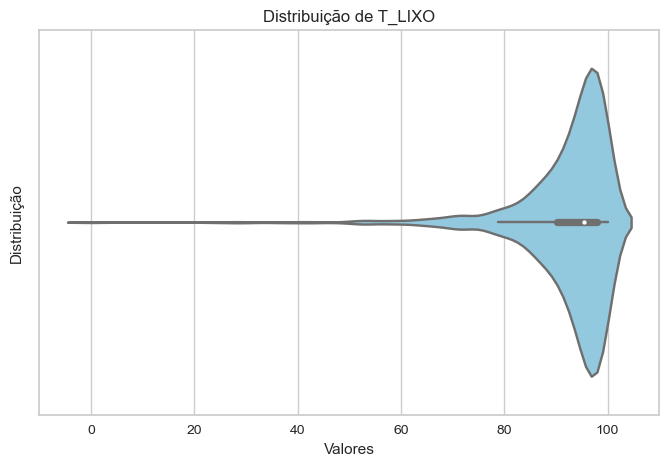

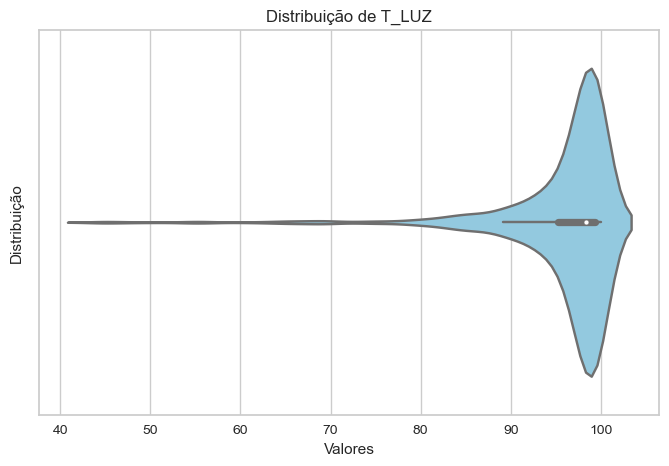

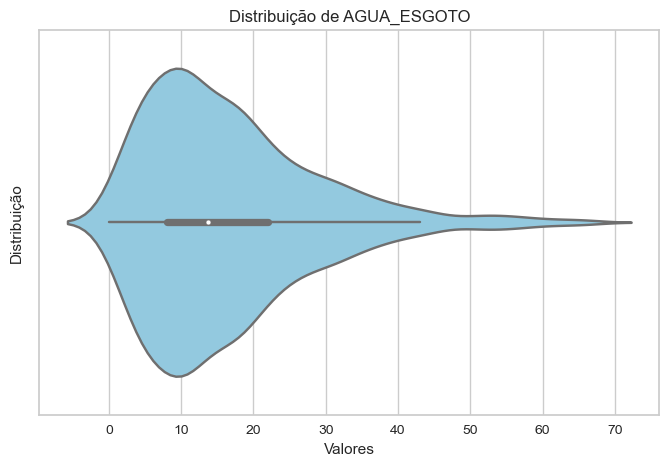

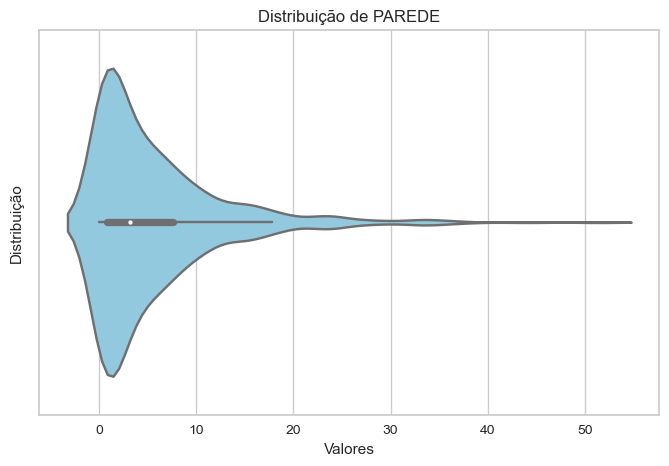

In [4]:
columns = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

for column in columns:
    plt.figure(figsize=(8, 5))  # Ajuste o tamanho da figura conforme necessário
    sns.violinplot(x=df[column], color='skyblue')
        
    # Ajuste o nome dos eixos e o título
    plt.xlabel('Valores')  # Nome do eixo X
    plt.ylabel('Distribuição')  # Nome do eixo Y
    plt.title(f'Distribuição de {column}')  # Título do gráfico
        
    # Exiba o plot
    plt.show()

# 3) Redução da dimensinalidade

## 3.1) Pré-processamento

In [5]:
df_pp = df[columns].copy()
scaler = StandardScaler()
df_pp[columns] = scaler.fit_transform(df_pp[columns])
df_pp

,PREC_MED,TEMP_MED,QUAL_MED_AGUA,DIST_CORPO_AGUA,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,DOCSUP_EM_PUB,...,AREA_IRRIGADA_TOT,AREA_IRRIGADA_POT,AREA_IRRIGADA_POT_E,IDH,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE
0,-0.038239,0.143653,-0.672664,0.255271,-0.013077,0.510536,-0.147022,-0.283921,1.033581,0.766395,...,-0.089073,-0.318230,-0.120373,1.475624,1.087767,0.086309,0.544792,0.539082,-0.358608,-0.688153
1,-0.307240,0.718595,-0.352958,-0.144744,0.206196,-0.277346,0.047194,-0.256583,-1.763812,-0.205609,...,-0.216751,-0.318230,-0.120373,0.062003,-0.275109,1.501582,-0.432130,0.449082,0.131455,-0.015139
2,-0.307240,0.718595,-0.352958,-0.635652,1.018691,2.203494,-1.189657,-1.555108,-0.792960,-0.859220,...,-0.216751,-0.175104,-0.120373,-1.917065,-1.559279,1.230253,0.731974,0.270511,0.054253,0.949910
3,-0.010214,-0.328243,-0.352958,0.634906,1.378081,0.388593,-0.831890,-0.953686,0.674700,0.006653,...,-0.216751,-0.318230,-0.120373,-1.557235,-2.598074,0.264922,-0.508896,0.359082,3.709585,0.487398
4,-0.685552,0.433264,-0.175071,0.874114,0.108843,-0.495103,0.047194,-0.242914,-1.213439,-0.826863,...,-0.216751,-0.318230,-0.120373,-2.199789,-2.613700,1.910621,0.091559,0.169083,2.006952,-0.456897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,-1.146487,0.402385,-0.396479,-0.679552,0.323567,0.063146,-0.320795,-0.010547,1.721881,2.081382,...,-0.216751,-0.314190,-0.120373,0.550345,1.013692,-1.424407,0.692013,0.529082,-0.151338,-0.316068
1257,-0.358745,-0.209288,-0.396479,-0.331810,0.655661,1.524093,-1.567868,-1.582445,1.547797,1.376000,...,-0.216751,-0.313748,-0.120373,-0.631956,-0.131587,-0.197291,0.315546,0.464796,0.697041,0.700865
1258,0.165685,-0.616874,-0.376727,-0.649722,0.627456,0.394927,-0.504789,-0.447945,1.500929,2.448958,...,-0.203396,-0.302294,-0.120373,0.319025,-0.172676,-0.765855,0.605783,0.404797,1.173678,-0.181169
1259,2.084193,0.238131,-0.436431,-0.612629,0.460954,1.555767,-0.024359,-0.858005,0.448391,1.722867,...,-0.078903,-0.309733,-0.120373,0.319025,1.487081,0.134030,0.720406,0.521939,-0.977061,-0.526571


## 3.2) Aplicação do PCA

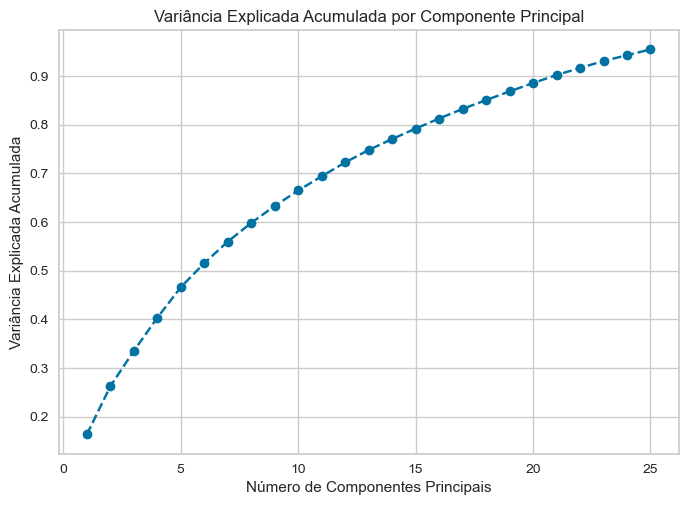

In [6]:
# Aplicar o PCA
pca = PCA(n_components = 0.95)
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.3) Análise de Cluster

In [7]:
tsne = TSNE(n_components=2, random_state=42)
df_components = tsne.fit_transform(df_pp)
df_components = pd.DataFrame(df_components)
df_components.columns = ['COMPONENT1', 'COMPONENT2']

def plot(df, df_components, clusters):
    df = pd.concat([df, df_components], axis = 1)
    df['CLUSTER'] = clusters

    actual_cities = df[['NOME', 'COMPONENT1', 'COMPONENT2', 'CLUSTER']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='COMPONENT1', y='COMPONENT2', hue='CLUSTER', palette='Set2')
    sns.scatterplot(data=actual_cities, x='COMPONENT1', y='COMPONENT2', marker = 'X', color='black', s=100, label='Cidades atuais')
    for i, row in actual_cities.iterrows():
        plt.text(row['COMPONENT1'] + 0.1, row['COMPONENT2'], row['NOME'], fontsize=12)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Visualização dos Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

### 3.3.1) Hierarchical Clustering

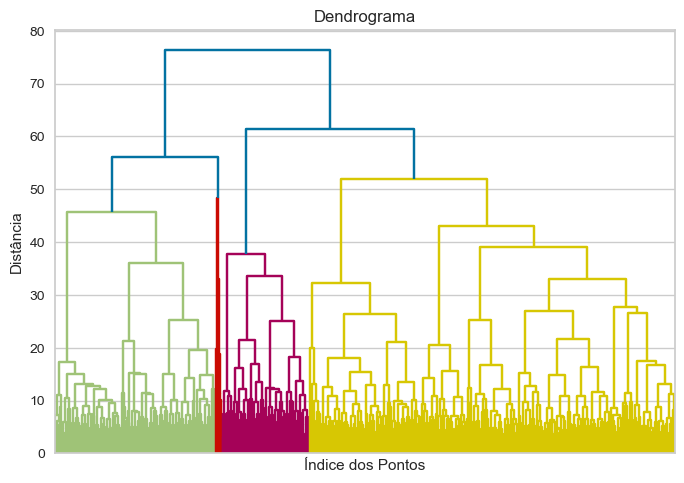

In [8]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.0562
Davies-Bouldin Score:  2.6286
Calinski-Harabasz Index:  78.7204


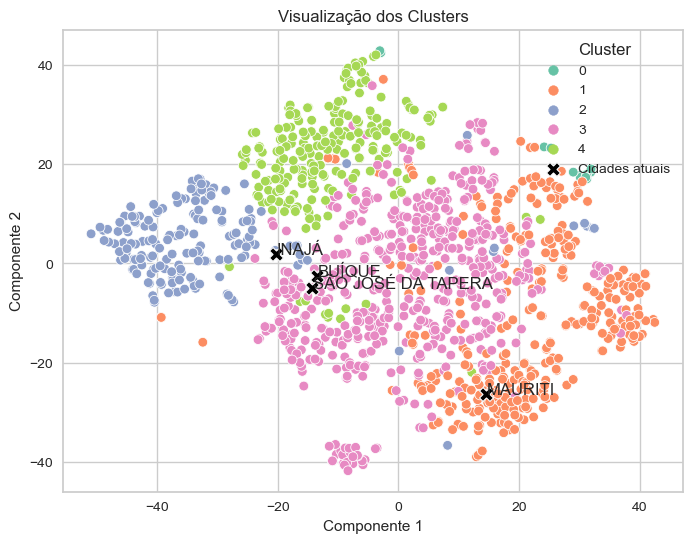

In [9]:
hclustering = AgglomerativeClustering(n_clusters=5)
clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, clusters),4))
plot(df, df_components, clusters)

### 3.3.2) K-Means

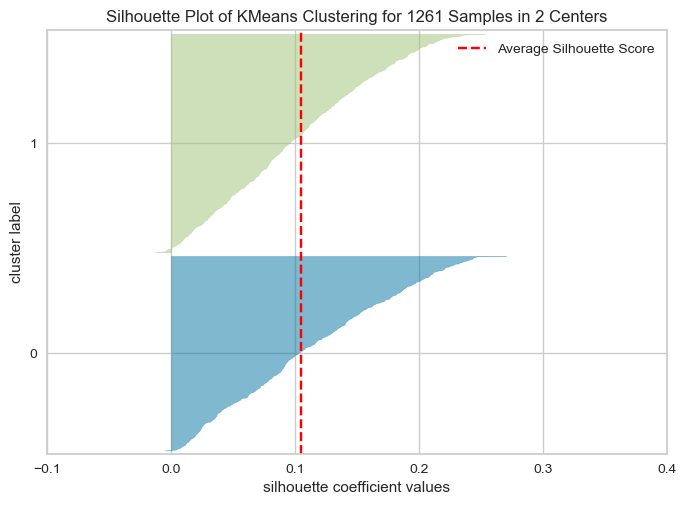

In [10]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.105
Davies-Bouldin Score:  2.6921
Calinski-Harabasz Index:  150.8368


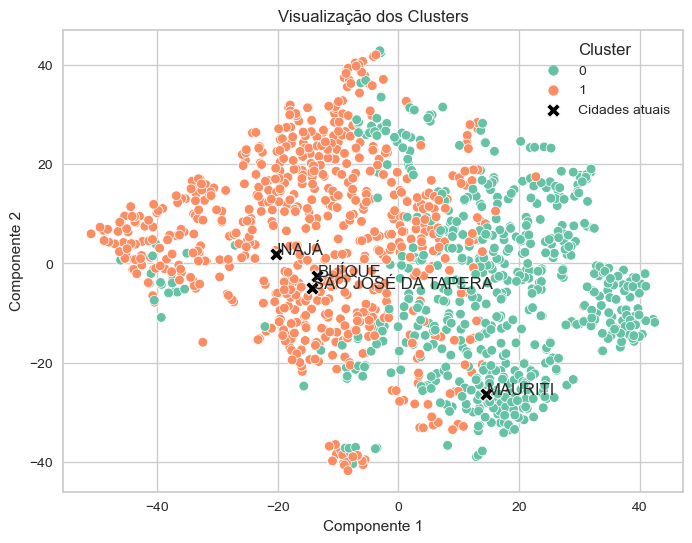

In [11]:
kmeans = KMeans(2, random_state = 42)
clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, clusters),4))
plot(df, df_components, clusters)

## 3.4) Seleção dos municípios com maior potencial

In [12]:
df = pd.concat([df, df_components], axis = 1)
df['CLUSTER'] = clusters


In [16]:
df[['NOME', 'UF', 'IDH','POP_TOT', 'POP_TOTAL_30KM', 'CLUSTER', 'AREA_IRRIGADA_POT_E']].loc[df['CLUSTER'] == 1].sort_values(by='IDH')

,NOME,UF,IDH,POP_TOT,POP_TOTAL_30KM,CLUSTER,AREA_IRRIGADA_POT_E
13,INHAPI,AL,0.484,18592.2,91362.2,1,0.000000
1049,SÃO FRANCISCO DE ASSIS DO PIAUÍ,PI,0.485,5748.0,16403.4,1,0.000000
160,ITAPICURU,BA,0.486,35881.0,197766.2,1,23.347661
843,MANARI,PE,0.487,20345.6,132562.0,1,0.000000
947,CAXINGÓ,PI,0.488,5275.2,35687.4,1,0.000000
...,...,...,...,...,...,...,...
956,CORRENTE,PI,0.642,26075.2,60248.0,1,47.434201
226,PALMEIRAS,BA,0.643,9151.8,100025.4,1,119.832578
1158,MESSIAS TARGINO,RN,0.644,4528.8,48762.4,1,0.000000
1057,SÃO JOÃO DO PIAUÍ,PI,0.645,20137.4,43240.4,1,0.000000


In [18]:
actual_cities = df[['NOME', 'UF', 'IDH','POP_TOT', 'POP_TOTAL_30KM', 'CLUSTER', 'AREA_IRRIGADA_POT_E']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]
actual_cities

,NOME,UF,IDH,POP_TOT,POP_TOTAL_30KM,CLUSTER,AREA_IRRIGADA_POT_E
34,SÃO JOSÉ DA TAPERA,AL,0.527,32258.8,225558.2,1,0.000000
418,MAURITI,CE,0.605,46103.4,207315.4,0,42.459601
796,BUÍQUE,PE,0.527,56502.4,234399.4,1,0.000000
827,INAJÁ,PE,0.523,21917.0,89734.8,1,0.000000
